To do:

-import dataset

-check for null and categorical values

-perform data analysis(distribution of age value, gender distribution, bmi distribution, count of children, count of smoker column, count of region column, distribution of charges value)

-data preprocessing(encode the categorical columns, split feature and target variables, split into train and test data)

-model training(Linear regression)

-model evaluation(perform r squared value for both train aand test data)

-build a prediction system



In [2]:
#import depedencies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset
df = pd.read_csv('/content/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


we have 3 categorical columns:

--> sex

-->smoker

-->region

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


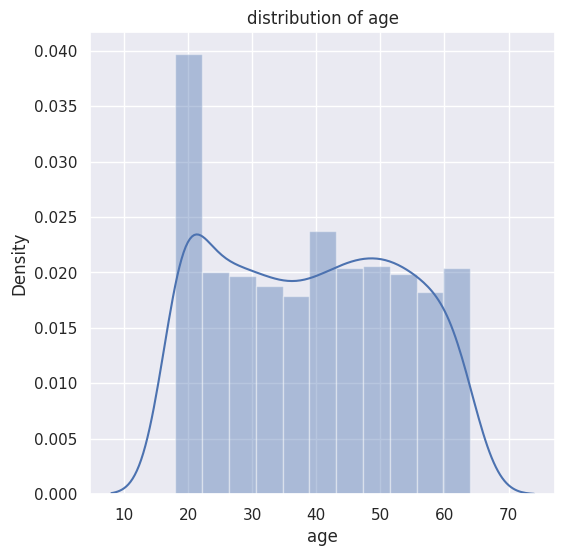

In [11]:
#data analysis

#distribution of age
sns.set() #By calling sns.set() without any arguments, Seaborn applies a default set of aesthetic parameters that changes the style of your plots to be more attractive and easier to read compared to the default Matplotlib styles.
plt.figure(figsize = (6,6))
sns.distplot(df['age'])
plt.title('distribution of age')
plt.show()

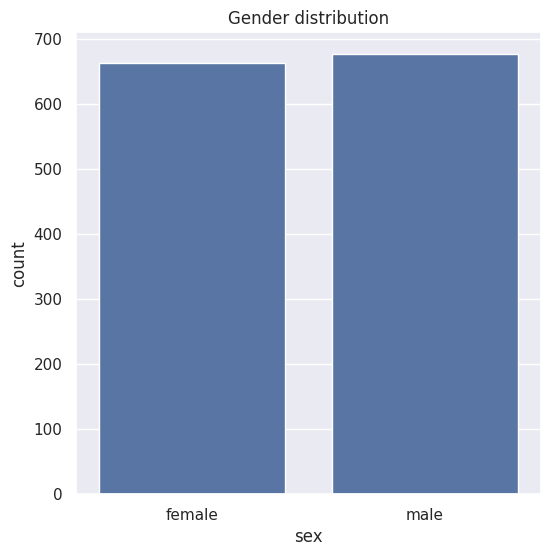

In [16]:
#gender distribution

plt.figure(figsize=(6,6))
sns.countplot(x ='sex',data = df)
plt.title('Gender distribution')
plt.show()

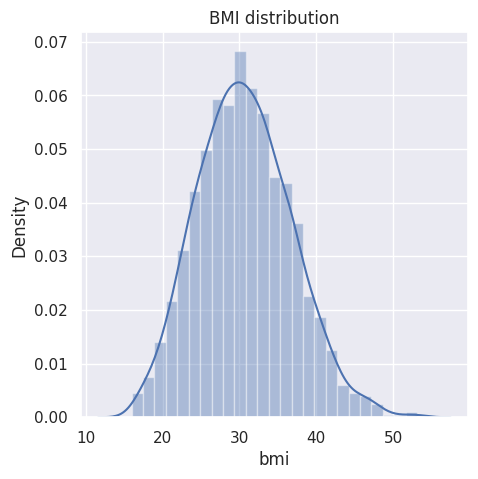

In [18]:
#bmi distribution

plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])
plt.title('BMI distribution')
plt.show()

#Normal BMI Range --> 18.5 to 24.9

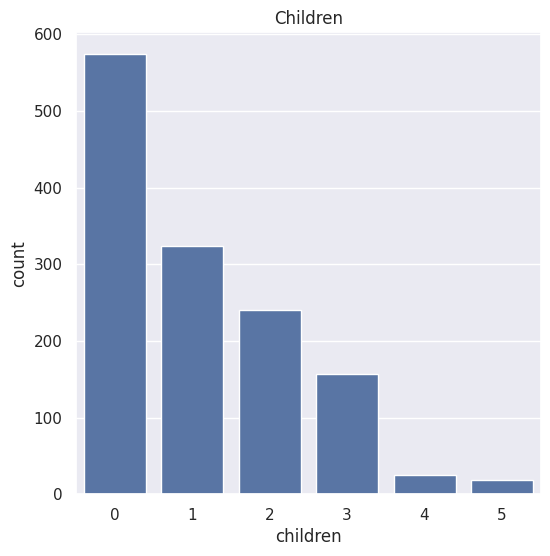

In [20]:
#children count
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

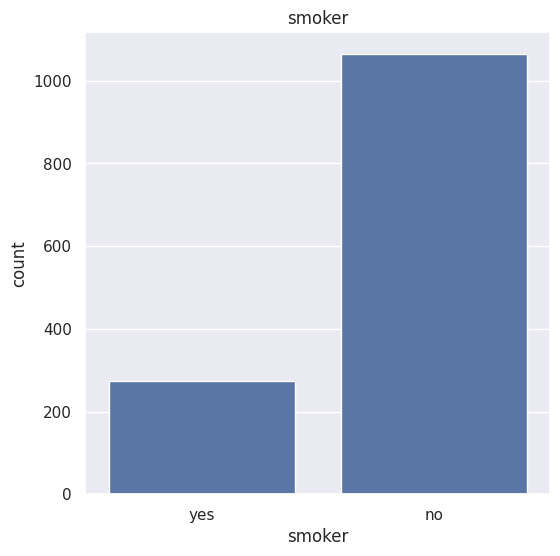

In [21]:
#smoker

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

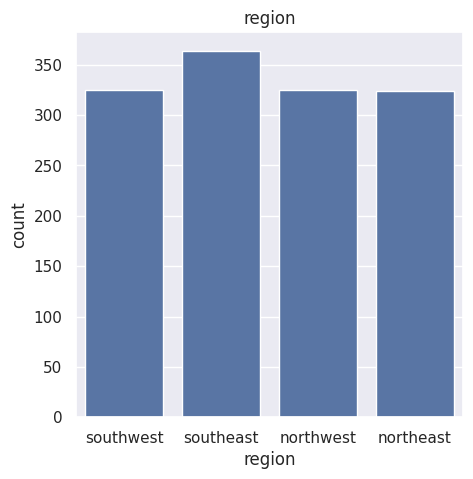

In [22]:
# region column
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

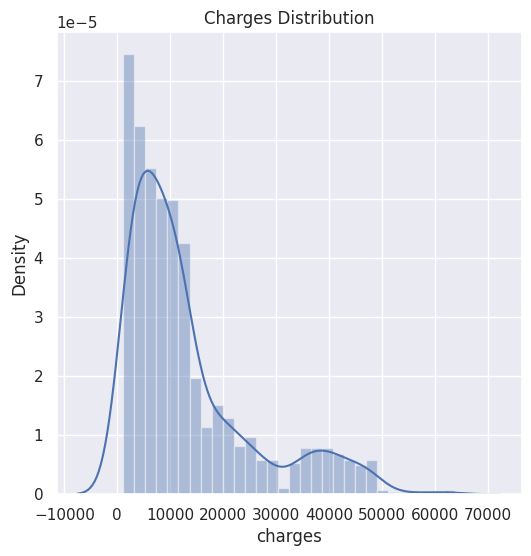

In [23]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [25]:
print(df['sex'].value_counts())
print(df['region'].value_counts())
print(df['smoker'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64


In [64]:
#Data preprocessing

#encode the categorical columns

df.replace({'sex' : {'male':0, 'female': 1}}, inplace=True)
df.replace({'region' : {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)
df.replace({'smoker' : {'no' : 0, 'yes' : 1}}, inplace=True)

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [66]:
X = df.drop('charges', axis = 1)
Y = df['charges']

In [67]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [68]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [69]:
#splitting data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [70]:
#model training
reg = LinearRegression()

In [71]:
reg.fit(X_train,Y_train)

LinearRegression()

In [72]:
#model evaluation

#training data
training_data_prediction = reg.predict(X_train)

In [73]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', error_score)

R squared value :  0.7518195459072954


In [74]:
#testing data
testing_data_prediction = reg.predict(X_test)

In [75]:
error_score1 = metrics.r2_score(Y_test, testing_data_prediction)
print('R squared value : ', error_score1)

R squared value :  0.7454471618659976


In [77]:
#prediction system

#sample = (18,0,33.770,1,0,0)
sample = (31,1,25.74,0,0,0)
sample_asarray = np.asarray(sample)
reshaped_array = sample_asarray.reshape(1,-1)

prediction = reg.predict(reshaped_array)

print('The insurance cost will be :', prediction[0])

The insurance cost will be : 3632.0204329083863
